<a href="https://colab.research.google.com/github/ShapatinAA/smgmo/blob/main/4%20lab%20seocnd%20part%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 4

## Реализация многослойного перцептрона

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


# Функции активации
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


def tanh(x):
    return torch.tanh(x)


def relu(x):
    return torch.maximum(torch.tensor(0.0), x)


class MultilayerPerceptron(nn.Module):
    def __init__(self, layer_dims, activation='relu'):
        super(MultilayerPerceptron, self).__init__()

        self.activation = activation
        self.layers = nn.ModuleList()

        for i in range(len(layer_dims) - 1):
            self.layers.append(nn.Linear(layer_dims[i], layer_dims[i + 1]))

    def forward(self, x):

        for layer in self.layers[:-1]:
            if self.activation == 'sigmoid':
                x = sigmoid(layer(x))
            elif self.activation == 'tanh':
                x = tanh(layer(x))
            elif self.activation == 'relu':
                x = relu(layer(x))


        x = self.layers[-1](x)
        return x


    def fit(self, x_train, y_train, learning_rate=0.01, batch_size=32, epochs=1000, logs=False):
        loss = 0.0
        criterion = nn.CrossEntropyLoss()  # Функция потерь для многоклассовой классификации
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)  # Оптимизатор стохастического градиентного спуска

        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
                targets = torch.tensor(y_train[i:i + batch_size], dtype=torch.long)

                optimizer.zero_grad()

                outputs = self(inputs)
                loss = criterion(outputs, targets)

                loss.backward()
                optimizer.step()

            if logs:
              print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


    def predict(self, x):
        with torch.no_grad():
            inputs = torch.tensor(x, dtype=torch.float32)
            outputs = self(inputs)
            _, predicted = torch.max(outputs, 1)
            return predicted.numpy()

## Обучение модели на различных выборках

Функция для обучения, тестирования и вывода метрик:

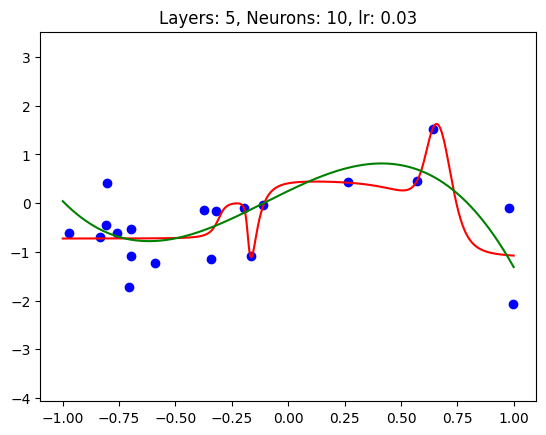

In [17]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.datasets.mnist as mnist
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader
import torchvision.transforms as trnsfrms
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

class MLP(nn.Module):
    def __init__(self, hidden_layers_num=3, neyrons_num=5, activation_func=nn.ReLU):
        super().__init__()
        hidden_layers = []
        for i in range(hidden_layers_num-1):
            hidden_layers.append(nn.Linear(neyrons_num, neyrons_num, dtype=torch.float64))
            hidden_layers.append(activation_func())
        self.model = nn.Sequential(
            nn.Linear(1, neyrons_num, dtype=torch.float64),
            activation_func(),
            *hidden_layers,
            nn.Linear(neyrons_num, 1, dtype=torch.float64),
        )

    def forward(self, x):
        return self.model(x)

    def fit(self, X: torch.Tensor, Y: torch.Tensor, epochs=3000, batch_size=20, lr=0.1, tracking_loss=False):
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=lr)

        for epoch in range(epochs):
            self.model.train()
            indices = torch.randperm(X.shape[0])
            x, y = X[indices], Y[indices]
            for i in range(0, X.shape[0], batch_size):
                x_batch, y_batch = x[i:i+batch_size], y[i:i+batch_size]

                outputs = self.model(x_batch)
                loss = self.criterion(outputs, y_batch)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            if (tracking_loss and (epoch+1) % 10 == 0):
                print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')

    def predict(self, X):
        self.model.eval()
        return self.forward(X)

x_polinom = np.linspace(-1, 1, 1000)
a, b, c, d = np.random.uniform(low=-3, high=3, size=4)
y_polinom = a * x_polinom**3 + b * x_polinom**2 + c * x_polinom + d

N = 20
x = np.random.uniform(low=-1, high=1, size=N)
y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, 0.5, N)

def draw_polinom_regression(num_of_layers, neyrons_num, epochs, lr, batch_size, func=nn.ReLU):
    model = MLP(hidden_layers_num=num_of_layers, neyrons_num=neyrons_num, activation_func=func)
    model.fit(torch.tensor(x).reshape(-1, 1), torch.tensor(y).reshape(-1, 1), epochs=epochs, batch_size=batch_size, lr=lr)
    xx = np.linspace(-1, 1, 10000)

    plt.plot(xx, model.predict(torch.tensor(xx).reshape(-1, 1)).detach().numpy(), color="red")
    plt.scatter(x, y, color="blue")
    plt.plot(x_polinom, y_polinom, color="green")

    plt.ylim(y.min() - 2, y.max() + 2)
    plt.title(f'Layers: {num_of_layers}, Neurons: {neyrons_num}, lr: {lr}')
    plt.show()

draw_polinom_regression(num_of_layers=5, neyrons_num=10, epochs=10000, lr=0.03, batch_size=N//5,func=nn.Tanh)

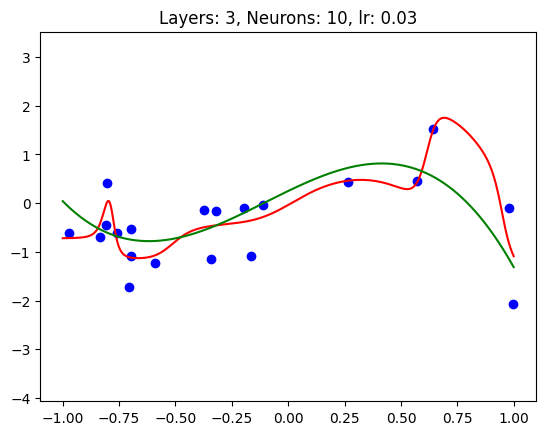

In [18]:
draw_polinom_regression(num_of_layers=3, neyrons_num=10, epochs=10000, lr=0.03, batch_size=N//5,func=nn.Tanh)